In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import splitfolders
import shutil
import seaborn as sns
import plotly.express as px
import keras 
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import tensorflow as tf
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [15]:
path = "../archive"
print(os.listdir(path))

['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']


In [16]:
splitfolders.ratio(path,seed=1337, output="Sugarcane-Splitted", ratio=(0.6, 0.2, 0.2))

In [17]:
import cv2

img_path = "./Sugarcane-Splitted/train/Yellow/yellow (337).jpeg"
image = cv2.imread(img_path)
if image is not None:
    image_shape = image.shape
    print("Image shape:", image_shape)
else:
    print("Error: Image not found or could not be loaded.")

Image shape: (1040, 493, 3)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


input_shape= (260, 123, 3)

train_dir = './Sugarcane-Splitted/train'
val_dir = './Sugarcane-Splitted/val'
test_dir = './Sugarcane-Splitted/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
target_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

img_shape = train_generator.image_shape
print("Image dimensions:", img_shape)

Found 1511 images belonging to 5 classes.
Found 502 images belonging to 5 classes.
Found 508 images belonging to 5 classes.
Image dimensions: (224, 224, 3)


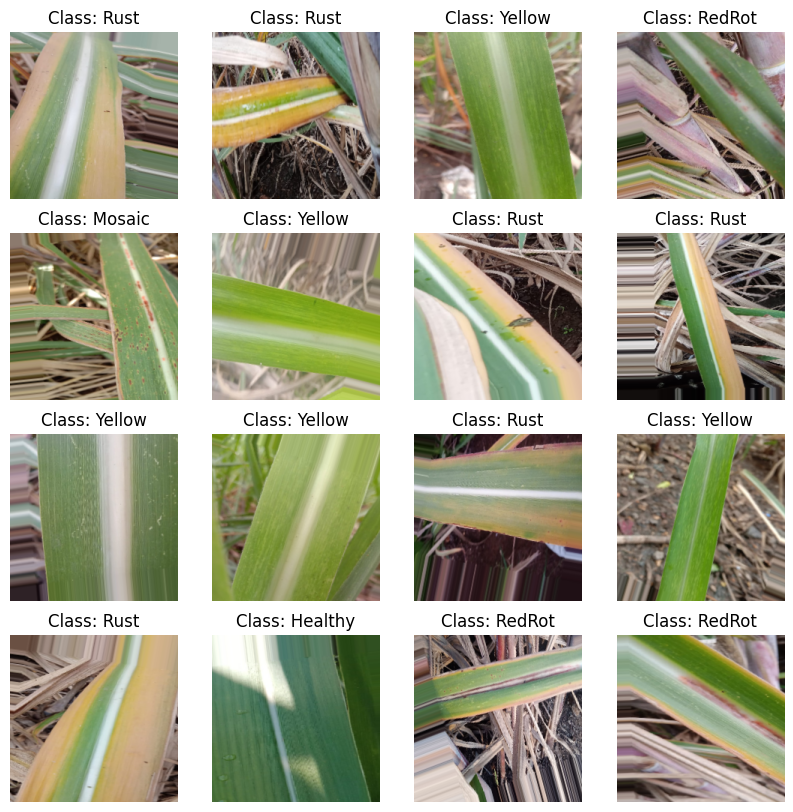

In [19]:
import matplotlib.pyplot as plt

def display_images(generator, num_rows=4, num_cols=4):
   
    images, labels = next(generator)

    class_indices = generator.class_indices
    
    CLASS_LABELS = ["Healthy", "Yellow", "RedRot", "Mosaic", "Rust"]

    class_names = [CLASS_LABELS[index] for index in range(len(CLASS_LABELS))]
    
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_names[np.argmax(labels[i])]}")
        plt.axis('off')

    plt.show()


display_images(train_generator)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,532,677 (169.88 MB)

 Trainable params: 44,530,693 (169.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model_checkpoint = ModelCheckpoint('inceptionv3_model_v2.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 50
history = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping, model_checkpoint]
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3731 - loss: 2.0218
Epoch 1: val_accuracy improved from -inf to 0.18327, saving model to inceptionv3_model_v2.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3741 - loss: 2.0180 - val_accuracy: 0.1833 - val_loss: 16.5667 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4870 - loss: 1.4936
Epoch 2: val_accuracy did not improve from 0.18327
48/48 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4874 - loss: 1.4931 - val_accuracy: 0.1833 - val_loss: 17.1883 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5540 - loss: 1.2391
Epoch 3: val_accuracy did not improve from 0.18327
48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5543 - loss: 1.2395 - val_accuracy: 0.1833 - val_loss: 20.8635 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5782 - loss: 1.2724
Epoch 4: val_accuracy did not improve from 0.18327

In [22]:
# Evaluate model
from sklearn.metrics import classification_report

# After training, evaluate the model on test set
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Get predictions
predictions = model2.predict(test_generator)
predictions_classes = np.argmax(predictions, axis=1)

# Get ground truth labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print(classification_report(true_classes, predictions_classes, target_names=class_labels))

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 501ms/step - accuracy: 0.8095 - loss: 0.4606
Test loss: 0.4042358100414276
Test accuracy: 0.8385826945304871
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step
              precision    recall  f1-score   support

     Healthy       0.89      0.74      0.81       105
      Mosaic       0.80      0.88      0.84        93
      RedRot       0.87      0.83      0.85       105
        Rust       0.85      0.85      0.85       104
      Yellow       0.81      0.90      0.85       101

    accuracy                           0.84       508
   macro avg       0.84      0.84      0.84       508
weighted avg       0.84      0.84      0.84       508



In [23]:
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.8095 - loss: 0.4606
Test loss: 0.4042358100414276
Test accuracy: 0.8385826945304871


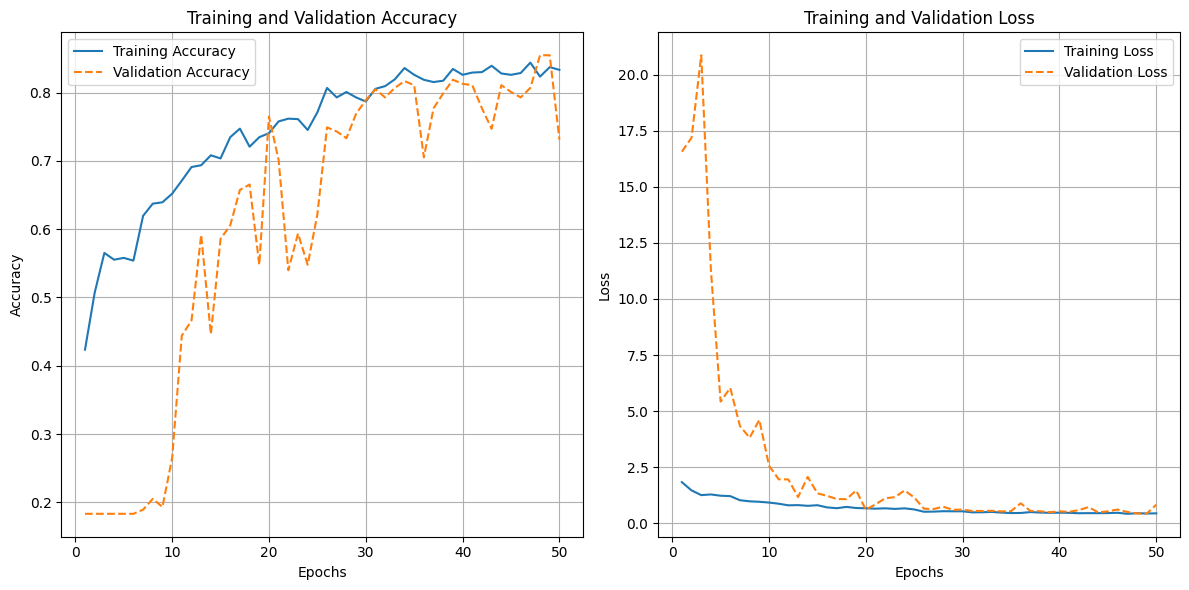

In [24]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extract accuracy and loss for both training and validation
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [25]:
model2.save('model2_v2.h5')